In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
n0=1
k=1.381e-23
T0=0
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19

In [13]:
def sigma(v):
    return 5e-20#*np.sqrt(2*1.602e-19/m)/v
def vm(v):
    return n0*v*sigma(v)
def dvm(v):
    return n0*sigma(v)

In [14]:
def a(v):
    return q**2*E**2/(3*vm(v)*m**2) + k*T0*vm(v)/m0
def b(v):
    return vm(v)*v*m/m0

In [15]:
def F(f,v):
    return -b(v)*f/a(v)

In [16]:
n=500

vmin=1e4
vmax=2*np.sqrt(24*1.602e-19/m)
v=np.logspace(np.log10(vmin),np.log10(vmax),n)
v=np.reshape(v,(n,1))

dv=v[1:]-v[:n-1]#v*((np.sqrt(24*1.602e-19/m)/1e-10)**(1/(n-1))-1)

f=np.ones(n)
for i in range(0,n-1):
    k1=dv[i]*F(f[i],v[i])
    k2=dv[i]*F(f[i]+0.5*k1,v[i]+0.5*dv[i])
    k3=dv[i]*F(f[i]+0.5*k2,v[i]+0.5*dv[i])
    k4=dv[i]*F(f[i]+k3,v[i]+dv[i])
    f[i+1]=f[i]+(k1+2*k2+2*k3+k4)/6
    if f[i+1]<100*np.finfo(float).eps:
        n=i
        print('Machine Epsilon reached')
        break
    if i<5:
        print(k1,k2,k3,k4,f[i])
'''for i in range(n-1,0,-1):
    k1=dv[i-1]*F(f[i],v[i])
    k2=dv[i-1]*F(f[i]+0.5*k1,v[i]+0.5*dv[i-1])
    k3=dv[i-1]*F(f[i]+0.5*k2,v[i]+0.5*dv[i-1])
    k4=dv[i-1]*F(f[i]+k3,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);
    f[i-1]=f[i]+(k1+2*k2+2*k3+k4)/6
    norm=np.max(np.abs(f))
    f=f/norm
    if i>n-5: print(k1,k2,k3,k4)
'''

[ -4.03622877e-09] [ -4.11013701e-09] [ -4.11013701e-09] [ -4.18494202e-09] 1.0
[ -4.23572090e-09] [ -4.31328208e-09] [ -4.31328208e-09] [ -4.39178436e-09] 0.99999999589
[ -4.44507301e-09] [ -4.52646769e-09] [ -4.52646768e-09] [ -4.60884996e-09] 0.999999991576
[ -4.66477243e-09] [ -4.75019006e-09] [ -4.75019006e-09] [ -4.83664412e-09] 0.99999998705
[ -4.89533057e-09] [ -4.98497000e-09] [ -4.98497000e-09] [ -5.07569708e-09] 0.999999982299
Machine Epsilon reached


'for i in range(n-1,0,-1):\n    k1=dv[i-1]*F(f[i],v[i])\n    k2=dv[i-1]*F(f[i]+0.5*k1,v[i]+0.5*dv[i-1])\n    k3=dv[i-1]*F(f[i]+0.5*k2,v[i]+0.5*dv[i-1])\n    k4=dv[i-1]*F(f[i]+k3,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);\n    f[i-1]=f[i]+(k1+2*k2+2*k3+k4)/6\n    norm=np.max(np.abs(f))\n    f=f/norm\n    if i>n-5: print(k1,k2,k3,k4)\n'

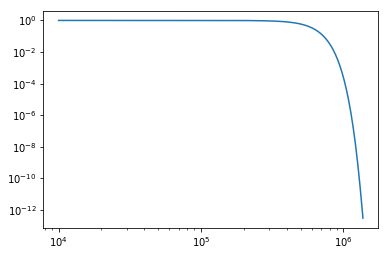

(408, 1)


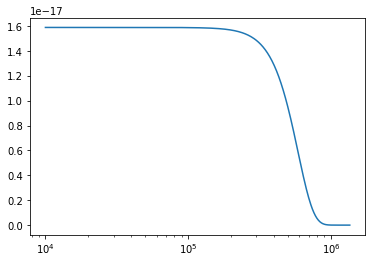

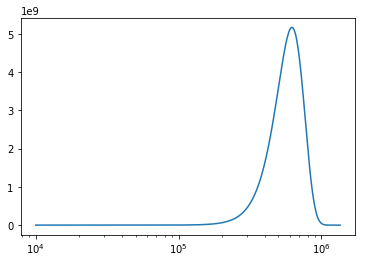

In [17]:
plt.loglog(v[:n],f[:n])
plt.show()
f=np.reshape(f[:n-1],(n-1,1))
dv=np.abs(dv)[:n-1]
v=v[:n-1]

f0=f/np.sum(f*v**2*dv) #Normalising f0

print(np.shape(dv))
plt.semilogx(v,f0)
plt.show()

eps=np.sum(0.5*m*v**4*f0*dv)/1.602e-19
plt.semilogx(v,(v**4*f0*dv))
plt.show()

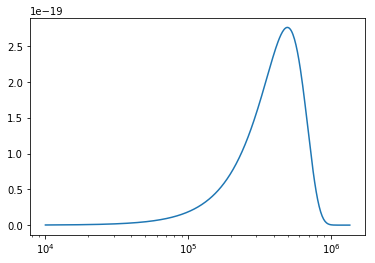

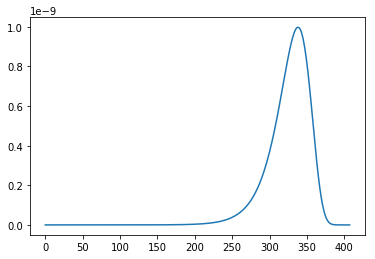

0.729298104874 0.575914577656


In [18]:
f1=-q*E*F(f,v)/(m*vm(v))/np.sum(f*v**2*dv) #Normalising f1
plt.semilogx(v,f1)
plt.show()

W=np.sum(dv*f1*v**3)/3/1e4
plt.plot(dv*f1*v)
plt.show()
print(eps,W)